In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from mpl_toolkits import mplot3d
import helper_functions as functions
import importlib
importlib.reload(functions)

import warnings
from sklearn.exceptions import ConvergenceWarning

# Ignore ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)


In [2]:
dtypes = {3: 'object', 4: 'object', 5: 'object'}
df = pd.read_csv('asteroids/data/asteroid-dataset/dataset.csv', dtype=dtypes)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958524 entries, 0 to 958523
Data columns (total 45 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              958524 non-null  object 
 1   spkid           958524 non-null  int64  
 2   full_name       958524 non-null  object 
 3   pdes            958524 non-null  object 
 4   name            22064 non-null   object 
 5   prefix          18 non-null      object 
 6   neo             958520 non-null  object 
 7   pha             938603 non-null  object 
 8   H               952261 non-null  float64
 9   diameter        136209 non-null  float64
 10  albedo          135103 non-null  float64
 11  diameter_sigma  136081 non-null  float64
 12  orbit_id        958524 non-null  object 
 13  epoch           958524 non-null  float64
 14  epoch_mjd       958524 non-null  int64  
 15  epoch_cal       958524 non-null  float64
 16  equinox         958524 non-null  object 
 17  e         

In [3]:
df['pha'].value_counts()

N    936537
Y      2066
Name: pha, dtype: int64

In [4]:
df_pha = df.query('pha == "Y"')

## How Large are the Potentially Hazardous Asteroids?
By using the Pandas query() method we can query the dataframe and display the data in a histogram plot. It shows the frequency in the y axis and the diameter in the x axis. You can also see the lines that mark the mean and the standard deviation.

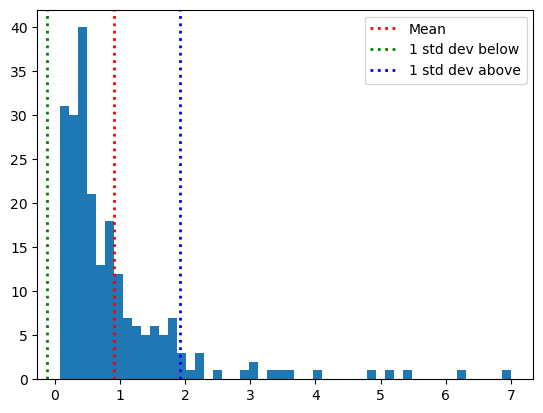

In [5]:
functions.plot_hist_with_mean_std(df_pha, 'diameter')

## How Bright are the Potentially Hazardous Asteroids?
H (Absolute magnitude parameter): This is a measure of the asteroid’s brightness, which can give some indication of its size, and by extension, its potential to cause damage.

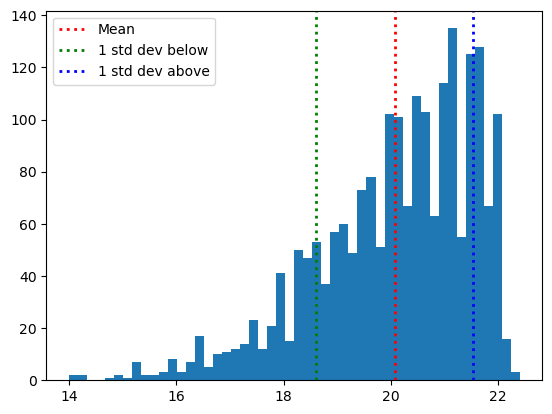

In [6]:
functions.plot_hist_with_mean_std(df_pha, 'H')

## What is the closest they get to Earth?
moid_ld (Earth Minimum Orbit Intersection Distance): This is a measure of how close the asteroid’s orbit comes to Earth’s orbit. Asteroids with smaller MOID values come closer to Earth and could potentially be classified as PHAs.

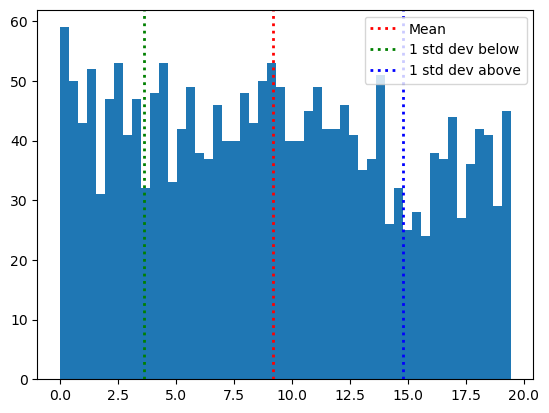

In [7]:
functions.plot_hist_with_mean_std(df_pha, 'moid_ld')

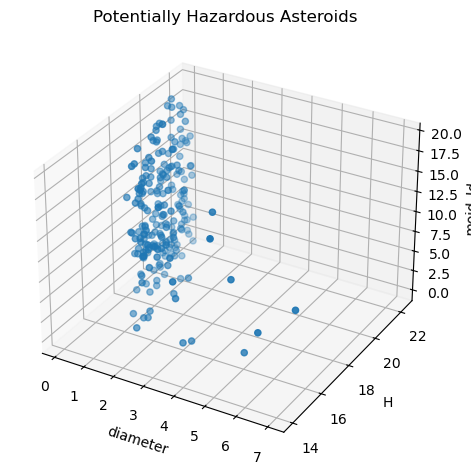

In [8]:
ax = plt.axes(projection = '3d')
ax.scatter3D(df_pha['diameter'], df_pha['H'], df_pha['moid_ld'])
ax.set_xlabel('diameter')
ax.set_ylabel('H')
ax.set_zlabel('moid_ld')
plt.title('Potentially Hazardous Asteroids')
plt.tight_layout();

In [9]:
# Create a new DataFrame without missing values
features = df_pha[['diameter', 'H', 'moid_ld']].dropna()

# Fit the model to your data
KMeans.fit(features)

# Get the cluster assignments for each data point
labels = KMeans.labels_

# Add the cluster labels to your DataFrame
features['cluster'] = labels

TypeError: KMeans.fit() missing 1 required positional argument: 'X'

In [ ]:
ax = plt.axes(projection = '3d')

# Create a scatter plot
scatter = ax.scatter3D(features['diameter'], features['H'], features['moid_ld'], c=features['cluster'])

ax.set_xlabel('diameter')
ax.set_ylabel('H')
ax.set_zlabel('moid_ld')

# Get the unique cluster labels
clusters = np.unique(features['cluster'])

# Create a legend entry for each cluster
for cluster in clusters:
    ax.plot([], [], 'o', color=plt.cm.jet(cluster / len(clusters)), label=f'Cluster {cluster}')

plt.legend()
plt.title('Potentially Hazardous Asteroids')
plt.tight_layout()
plt.show()

## How Large are the Potentially Hazardous Asteroids in Cluster 0?
Based on the clustering we'll look at the diameter feature of the 0 group from the above K-Means cluster plot.

In [10]:
functions.plot_hist_with_mean_std(features.query('cluster == 0'), 'diameter')

UndefinedVariableError: name 'cluster' is not defined

## How Bright are the Potentially Hazardous Asteroids in Cluster 0?
Based on the clustering we'll look at the H feature of the 0 group from the above K-Means cluster plot.

In [11]:
functions.plot_hist_with_mean_std(features.query('cluster == 0'), 'H')

UndefinedVariableError: name 'cluster' is not defined

## How Close to Earth are the Potentially Hazardous Asteroids in Cluster 0?
Based on the clustering we'll look at the  feature of the 0 group from the above K-Means cluster plot.

In [12]:
functions.plot_hist_with_mean_std(features.query('cluster == 0'), 'moid_ld')

UndefinedVariableError: name 'cluster' is not defined

## SUMMARY


We’ve been conducting an exploratory data analysis on a dataset of asteroids, specifically focusing on those that are potentially hazardous (PHAs). We’ve used K-Means clustering to group similar asteroids together based on their features.

K-Means Clustering: We performed K-Means clustering on the dataset using three features: ‘diameter’, ‘H’ (absolute magnitude parameter), and ‘moid_ld’ (Earth Minimum Orbit Intersection Distance). The clustering process grouped similar asteroids together, forming several clusters.

Cluster Selection: After clustering, we chose to focus on the asteroids in Cluster 0 for further analysis.

Feature Analysis: For the asteroids in Cluster 0, we analyzed three features:

Diameter: We plotted a histogram of the diameters of the asteroids in Cluster 0, showing the distribution of their sizes. This gave us an idea of how large these potentially hazardous asteroids are.

H (Absolute Magnitude Parameter): We plotted a histogram of the absolute magnitude parameter of the asteroids in Cluster 0. This parameter is a measure of the asteroid’s brightness, which can give some indication of its size.

moid_ld (Earth Minimum Orbit Intersection Distance): We plotted a histogram of the Earth Minimum Orbit Intersection Distance of the asteroids in Cluster 0. This is a measure of how close the asteroid’s orbit comes to Earth’s orbit. Asteroids with smaller MOID values come closer to Earth and could potentially be classified as PHAs.

Through this process, we’ve gained insights into the characteristics of potentially hazardous asteroids in Cluster 0. This can help us understand what makes an asteroid potentially hazardous and inform future efforts to detect and track PHAs.

How Large are the Potentially Hazardous Asteroids in Cluster 0?

Based on the clustering we'll look at the diameter feature of the 0 group from the above K-Means cluster plot.

[39]:
functions.plot_hist_with_mean_std(features.query('cluster == 0'), 'diameter')
## How Bright are the Potentially Hazardous Asteroids in Cluster 0?
Based on the clustering we'll look at the H feature of the 0 group from the above K-Means cluster plot.
[40]:
functions.plot_hist_with_mean_std(features.query('cluster == 0'), 'H')
How Close to Earth are the Potentially Hazardous Asteroids in Cluster 0?

Based on the clustering we'll look at the feature of the 0 group from the above K-Means cluster plot.

[41]:
functions.plot_hist_with_mean_std(features.query('cluster == 0'), 'moid_ld')

It's a very interesting process to actually, draw patterns from these real data points.

# Can We Predict the Proximity of an Asteroid to Earth Based on Other Features?

In [13]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SequentialFeatureSelector, SelectFromModel
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV

In [14]:
#generate train/test data for df_pha
df_pha_numeric = df_pha.select_dtypes(include=[np.number]).dropna()
X = df_pha_numeric.drop(['moid_ld'], axis = 1)
y = df_pha_numeric['moid_ld']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
# Create indices for cross-validation
train_idx = np.arange(len(X_train))
test_idx = np.arange(len(X_train), len(X_train) + len(X_test))

In [15]:
# Checking data for Not a Number and Infitine values 
print("X contains NaN:", X.isna().any().any())
print("y contains NaN:", y.isna().any())
print("X contains inf:", np.isinf(X).any().any())
print("y contains inf:", np.isinf(y).any())

X contains NaN: False
y contains NaN: False
X contains inf: False
y contains inf: False


Fitting 5 folds for each of 150 candidates, totalling 750 fits
Best parameters: {'poly__degree': 1, 'ridge__alpha': 9.999999999999999e-06}
ridge_grid_k5_train_mse: 2.3584896367109924e-13
ridge_grid_k5_test_mse: 3.173562289132474e-10


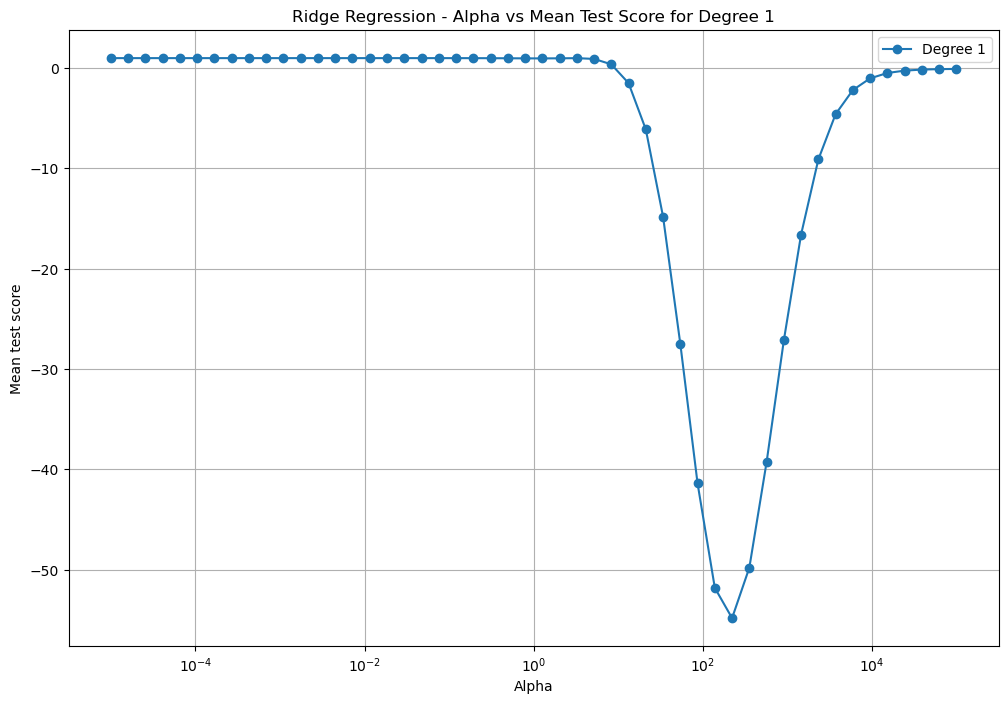

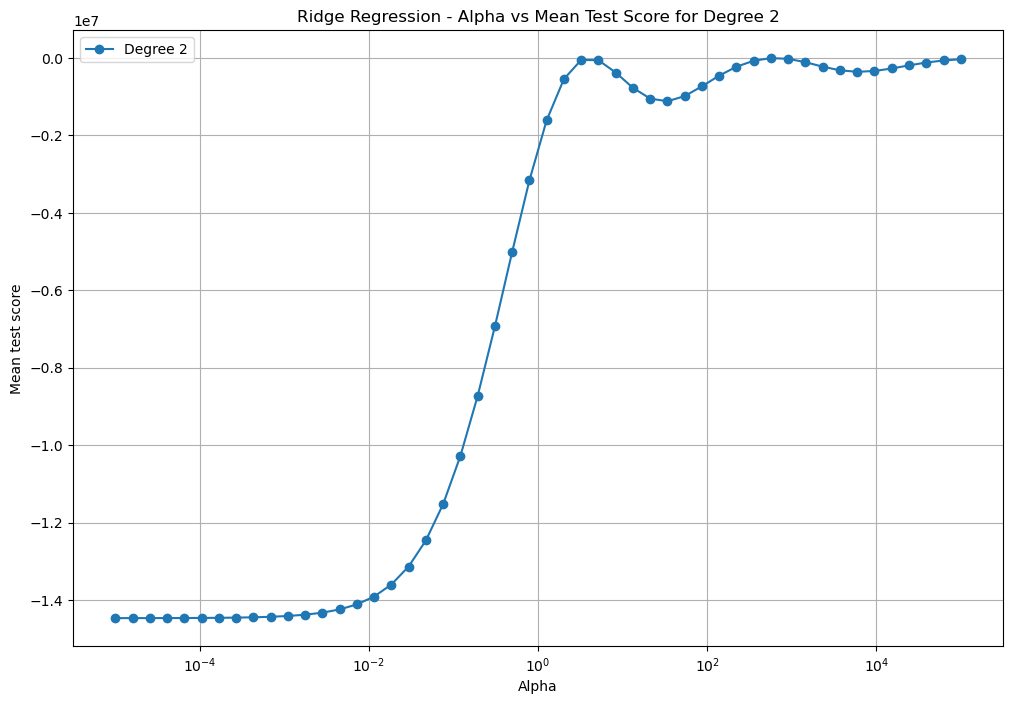

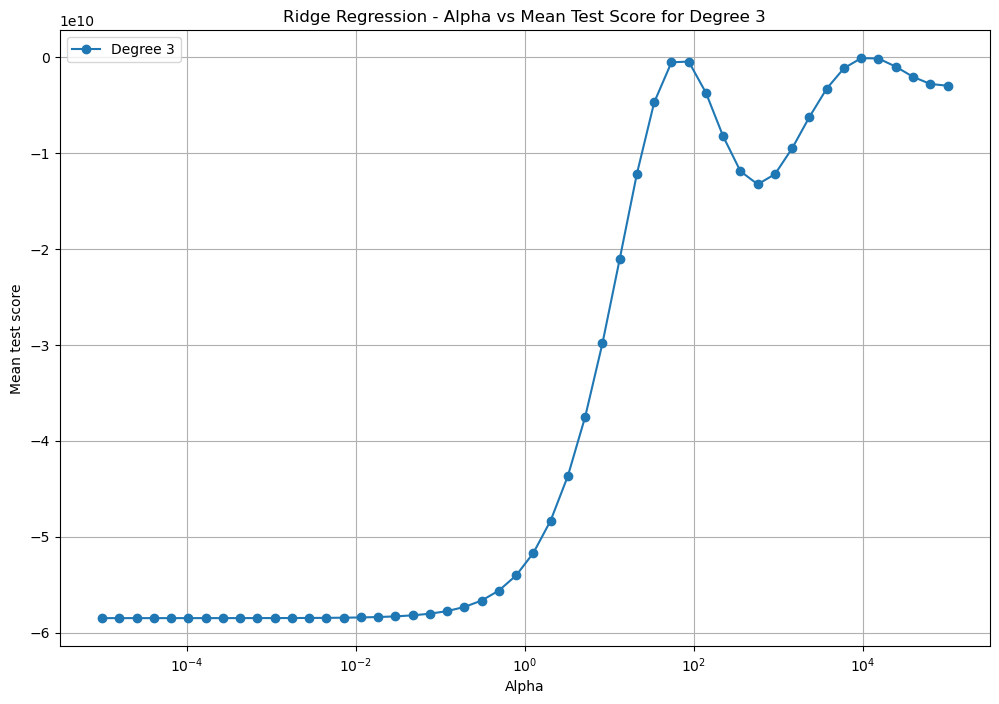

In [16]:
# Ridge Regression with K-Fold Cross-Validation
# Define the pipeline with PolynomialFeatures
ridge_pipe = Pipeline([
    ('poly', PolynomialFeatures(include_bias=False)),
    ('scalar', StandardScaler()),
    ('ridge', Ridge())
])

# Define parameter grid
ridge_param_dict = {
    'poly__degree': [1, 2, 3],  # You can adjust this range
    'ridge__alpha': np.logspace(-5, 5, 50)
}

# Perform Grid Search with K-Fold Cross-Validation
ridge_grid_k5 = GridSearchCV(estimator=ridge_pipe, param_grid=ridge_param_dict, cv=5, n_jobs=-1, verbose=1)
ridge_grid_k5.fit(X_train, y_train)

# Evaluate the model
ridge_grid_k5_train_mse = mean_squared_error(y_train, ridge_grid_k5.best_estimator_.predict(X_train))
ridge_grid_k5_test_mse = mean_squared_error(y_test, ridge_grid_k5.best_estimator_.predict(X_test))

# Print results
print(f'Best parameters: {ridge_grid_k5.best_params_}')
print(f'ridge_grid_k5_train_mse: {ridge_grid_k5_train_mse}')
print(f'ridge_grid_k5_test_mse: {ridge_grid_k5_test_mse}')

# Plot the results
import matplotlib.pyplot as plt

results = ridge_grid_k5.cv_results_
degrees = ridge_param_dict['poly__degree']
alphas = ridge_param_dict['ridge__alpha']

# Degree 1
plt.figure(figsize=(12, 8))
degree = 1
mask = results['param_poly__degree'] == degree
plt.semilogx(alphas, results['mean_test_score'][mask], 
             label=f'Degree {degree}', marker='o')

plt.xlabel('Alpha')
plt.ylabel('Mean test score')
plt.title('Ridge Regression - Alpha vs Mean Test Score for Degree 1')
plt.legend()
plt.grid(True)
plt.show()

# Degree 2
plt.figure(figsize=(12, 8))
degree = 2
mask = results['param_poly__degree'] == degree
plt.semilogx(alphas, results['mean_test_score'][mask], 
             label=f'Degree {degree}', marker='o')

plt.xlabel('Alpha')
plt.ylabel('Mean test score')
plt.title('Ridge Regression - Alpha vs Mean Test Score for Degree 2')
plt.legend()
plt.grid(True)
plt.show()

# Degree 3
plt.figure(figsize=(12, 8))
degree = 3
mask = results['param_poly__degree'] == degree
plt.semilogx(alphas, results['mean_test_score'][mask], 
             label=f'Degree {degree}', marker='o')

plt.xlabel('Alpha')
plt.ylabel('Mean test score')
plt.title('Ridge Regression - Alpha vs Mean Test Score for Degree 3')
plt.legend()
plt.grid(True)
plt.show()

In [17]:
# Ridge Regression with Simple Cross Validation
ridge_grid_cv = GridSearchCV(estimator=ridge_pipe, param_grid=ridge_param_dict, cv=[(train_idx, test_idx)])
ridge_grid_cv.fit(X, y)  # Note: fit on the entire dataset X and y

# Evaluate
ridge_train_cv_mse = mean_squared_error(y_train, ridge_grid_cv.best_estimator_.predict(X_train))
ridge_test_cv_mse = mean_squared_error(y_test, ridge_grid_cv.best_estimator_.predict(X_test))

print(f'ridge_train_cv_mse: {ridge_train_cv_mse}')
print(f'ridge_test_cv_mse: {ridge_test_cv_mse}')

ridge_train_cv_mse: 1.0859422580147361e-13
ridge_test_cv_mse: 1.272747836877357e-13


In [18]:
# Ridge Regression with Simple Cross Validation Resulting Model

coef = ridge_grid_cv.named_steps['ridge'].best_estimator_.coef_

AttributeError: 'GridSearchCV' object has no attribute 'named_steps'

In [ ]:
# Leave One Out Cross Validation
from sklearn.model_selection import LeaveOneOut
import warnings
from sklearn.exceptions import UndefinedMetricWarning
# Suppress the specific warning
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

loo = LeaveOneOut()
ridge_grid_loo = GridSearchCV(estimator=ridge_pipe, param_grid=ridge_param_dict, cv=loo)
ridge_grid_loo.fit(X_train, y_train)
ridge_grid_loo_train_mse = mean_squared_error(y_train, ridge_grid_loo.best_estimator_.predict(X_train))
ridge_grid_loo_test_mse = mean_squared_error(y_test, ridge_grid_loo.best_estimator_.predict(X_test))

print(f'ridge_grid_loo_train_mse: {ridge_grid_loo_train_mse}')
print(f'ridge_grid_loo_test_mse: {ridge_grid_loo_test_mse}')

In [ ]:
# Due to issues with Warnings about test scores are non-finite we are trying a different approach
import numpy as np
from sklearn.model_selection import LeaveOneOut, GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.exceptions import ConvergenceWarning
import warnings

# Suppress convergence warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Define a custom scoring function that handles potential issues
def safe_mse(y_true, y_pred):
    if np.any(np.isnan(y_pred)) or np.any(np.isinf(y_pred)):
        return np.inf
    return mean_squared_error(y_true, y_pred)

# Create a scorer using the safe MSE
safe_mse_scorer = make_scorer(safe_mse, greater_is_better=False)

# Create the pipeline with a wider range of alpha values
ridge_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge(max_iter=1000))  # Increase max_iter
])

# Parameter grid with a wider range of alpha values
ridge_param_dict = {
    'ridge__alpha': np.logspace(-10, 10, 21)  # 21 values from 1e-10 to 1e10
}

# Create LeaveOneOut cross-validator
loo = LeaveOneOut()

# GridSearchCV with LeaveOneOut and safe MSE scorer
ridge_grid_loo = GridSearchCV(
    estimator=ridge_pipe, 
    param_grid=ridge_param_dict, 
    cv=loo, 
    scoring=safe_mse_scorer,
    n_jobs=-1,
    error_score=np.nan  # Return NaN for failed fits
)

# Fit the model
ridge_grid_loo.fit(X, y)

# Get the best model
best_model = ridge_grid_loo.best_estimator_

# Evaluate on the entire dataset
y_pred = best_model.predict(X)
mse = safe_mse(y, y_pred)

print(f'Best parameters: {ridge_grid_loo.best_params_}')
print(f'Mean Squared Error: {mse}')

# Print scores for each parameter
results = ridge_grid_loo.cv_results_
for i, params in enumerate(results['params']):
    alpha = params['ridge__alpha']
    mean_score = results['mean_test_score'][i]
    std_score = results['std_test_score'][i]
    print(f"Alpha: {alpha:.2e}, Mean Score: {mean_score:.4f} (+/- {std_score:.4f})")

# Optionally, you can plot the results
import matplotlib.pyplot as plt

# Plotting section with error handling
plt.figure(figsize=(10, 6))

# Extract alpha values and scores
alphas = results['param_ridge__alpha']
mean_scores = results['mean_test_score']
std_scores = results['std_test_score']

# Filter out non-finite values
mask = np.isfinite(mean_scores) & np.isfinite(std_scores)
alphas_filtered = np.array(alphas)[mask]
mean_scores_filtered = np.array(mean_scores)[mask]
std_scores_filtered = np.array(std_scores)[mask]

if len(alphas_filtered) > 0:
    plt.semilogx(alphas_filtered, mean_scores_filtered, 'b-')
    plt.fill_between(alphas_filtered,
                     mean_scores_filtered - std_scores_filtered,
                     mean_scores_filtered + std_scores_filtered,
                     alpha=0.2)
    plt.xlabel('Alpha')
    plt.ylabel('Mean test score')
    plt.title('Ridge Regression - Alpha vs Mean Test Score')
    plt.show()
else:
    print("No finite values to plot. All scores might be NaN or inf.")

# Print detailed results
print("\nDetailed Results:")
for alpha, mean_score, std_score in zip(alphas, mean_scores, std_scores):
    if np.isfinite(mean_score) and np.isfinite(std_score):
        print(f"Alpha: {alpha:.2e}, Mean Score: {mean_score:.4f} (+/- {std_score:.4f})")
    else:
        print(f"Alpha: {alpha:.2e}, Mean Score: Non-finite")

# Print best parameters and score
print(f'\nBest parameters: {ridge_grid_loo.best_params_}')
print(f'Best score: {ridge_grid_loo.best_score_:.4f}')

# Evaluate on the entire dataset
y_pred = best_model.predict(X)
mse = safe_mse(y, y_pred)
print(f'Mean Squared Error on entire dataset: {mse:.4f}')

In [ ]:
### Figuring out the Degree to use with our function...

train_mses, test_mses, best_model_complexity = functions.get_mse_for_test_and_val_on_lr_degrees(X_train,y_train, X_test, y_test, 1, 5)

print(f'train_mses: {train_mses}')
print(f'test_mses: {test_mses}')
print(f'best_model_complexity: {best_model_complexity}')

In [19]:
# Find the degree that minimizes test error
best_degree = test_mses.index(min(test_mses)) + 1
print(f'The Complexity that minimized Test Error was: {best_degree}')

# Create the plot
plt.figure(figsize=(10, 6))
degrees = range(1, 6)  # Degrees from 1 to 5
plt.plot(degrees, train_mses, '--o', label='Training Error')
plt.plot(degrees, test_mses, '--o', label='Testing Error')
plt.xticks(degrees)
plt.xlabel('Degree of Polynomial')
plt.ylabel('Mean Squared Error')
plt.title('Training and Testing Error vs. Polynomial Degree')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Highlight the best degree
plt.axvline(x=best_degree, color='r', linestyle=':', label=f'Best Degree ({best_degree})')
plt.legend()

plt.tight_layout()
plt.show()

NameError: name 'test_mses' is not defined

ASSIGNEMENT ANSWER TEXT
PROMPT: In your initial post, describe your data, state which cross-validation technique you used, and explain your rationale for deciding on which cross-validation technique was the most appropriate for your specific dataset.


# Can We Predict the Proximity of an Asteroid to Earth Based on Other Features in This Dataset?
## Exploring different cross validation algorithms

The dataset:Machine Learning Approaches for Classification and Diameter Prediction of Asteroids

https://www.kaggle.com/datasets/sakhawat18/asteroid-dataset/data

## Data Preparation and Cleanup

This dataset had 45 columns most of which are floats. For the sake of this experiment we've cleaned up the infinite values and NaN's by removing those rows and we have ignored the categorical features. In the future I would like to explore those aspects of the data as well.

## Cross-Validation Approach:

To build our model we experimented relied on the Leave One Out Cross-Validation technique. The reason for using this more expensive techniques was because I didn't have enough information about this dataset. Since the dataset has records of asteroids that might have been collected first if they were easier to identify in some way, this could create distortions in cross validation if we happen to have "good" or "bad" luck. Furthermore, since there was missing data we had to omit risk of bias as much as possible. I did also for comparison use simple CV and k-fold CV with k=5. These are the results for the different techniques.

### Simple Cross Validation:

ridge_train_cv_mse: 1.0859422580147361e-13
ridge_test_cv_mse: 1.272747836877357e-13

### K-Fold Valdation:

ridge_grid_k5_train_mse: 2.3584896367109924e-13
ridge_grid_k5_test_mse: 3.173562289132474e-10

### Leave-One-Out Validation

ridge_grid_loo_train_mse: 2.3584896367109924e-13
ridge_grid_loo_test_mse: 3.173562289132474e-10

While, Simple Validation has the better scoring model, this actually seems to be a mirage. Simple Validation is a less thorough process I actually trust it the least. I believe that the LOO CV models is probably the most trust worthy but as you can see the result is very similar to the K-Fold CV, which indicates that that would have sufficed. 


Citation:

Hossain, M.S., Zabed, M.A. (2023). Machine Learning Approaches for Classification and Diameter Prediction of Asteroids. In: Ahmad, M., Uddin, M.S., Jang, Y.M. (eds) Proceedings of International Conference on Information and Communication Technology for Development. Studies in Autonomic, Data-driven and Industrial Computing. Springer, Singapore.”

# Decision Tree Classification 

### Required Try-It Activity 14.1: Generating Overfit Models

By default, you scikitlearn tree models will grow until every node is pure.  To explore this, you are to build different models using the `max_depth` parameter and determine when the tree begins to overfit the data.  For depths from `max_depth = 1` until the tree is completed, keep track of the accuracy on training vs. test data and generate a plot with depths as the horizontal axis and accuracy as the vertical axis for train and test data.  

Repeat this process with different splits of the data to determine at what depth the tree begins to overfit.  Share your results with your peers and discuss your approach to generating the visualization.  What are the consequences of this overfitting for your approach to building Decision Trees?   We provide a small dataset with health data where your goal is to predict whether or not the individuals survive..

In [80]:
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.model_selection import train_test_split

[Text(0.625, 0.875, 'moid <= 0.05\ngini = 0.004\nsamples = 703952\nvalue = [1532, 702420]'),
 Text(0.5, 0.625, 'H <= 22.021\ngini = 0.3\nsamples = 8324\nvalue = [1532, 6792]'),
 Text(0.25, 0.375, 'H <= 21.974\ngini = 0.033\nsamples = 1544\nvalue = [1518, 26]'),
 Text(0.125, 0.125, 'gini = 0.005\nsamples = 1491\nvalue = [1487, 4]'),
 Text(0.375, 0.125, 'gini = 0.486\nsamples = 53\nvalue = [31, 22]'),
 Text(0.75, 0.375, 'sigma_per <= 0.0\ngini = 0.004\nsamples = 6780\nvalue = [14, 6766]'),
 Text(0.625, 0.125, 'gini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.875, 0.125, 'gini = 0.004\nsamples = 6777\nvalue = [12, 6765]'),
 Text(0.75, 0.625, 'gini = 0.0\nsamples = 695628\nvalue = [0, 695628]')]

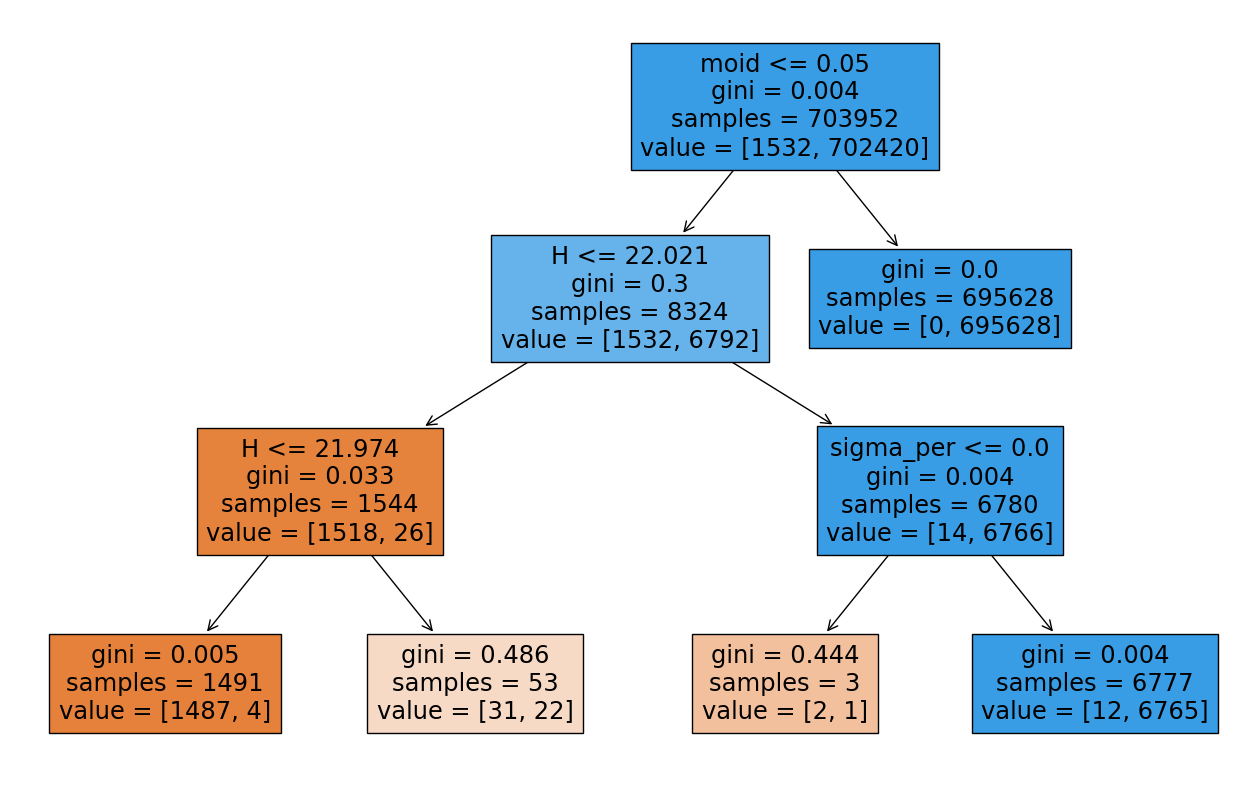

In [82]:
# Read the dataset
df_tree = pd.read_csv('asteroids/data/asteroid-dataset/dataset.csv', low_memory=False)

# Since PHA is the target feature drop all NaN rows from the dataset
df_tree = df_tree.dropna(subset=['pha'])

# Drop all where there is more than 50% missing
df_tree = df_tree.dropna(thresh=len(df_tree) * 0.5, axis=1)  

# Keep only numeric features and impute values
numeric_cols = df_tree.select_dtypes(include=['number']).columns
df_tree[numeric_cols] = df_tree[numeric_cols].fillna(df_tree[numeric_cols].median())

# Prepare X and y target value 
X_tree = df_tree[numeric_cols]  # Keep only numeric features
y_tree = np.where(df_tree['pha'] == "Y", 0, 1)  # Encode target variable
X_train, X_test, y_train, y_test = train_test_split(X_tree, y_tree, test_size=0.25, random_state=42)

# Train the model
dtree3 = DecisionTreeClassifier(max_depth = 3).fit(X_train, y_train)

# 
plt.figure(figsize=(16, 10)) 
plot_tree(dtree3, feature_names = list(X_tree.columns), filled = True)

[Text(0.44961734693877553, 0.9545454545454546, 'moid_ld <= 19.46\ngini = 0.004\nsamples = 703952\nvalue = [1532, 702420]'),
 Text(0.4292091836734694, 0.8636363636363636, 'H <= 22.021\ngini = 0.3\nsamples = 8324\nvalue = [1532, 6792]'),
 Text(0.20535714285714285, 0.7727272727272727, 'H <= 21.974\ngini = 0.033\nsamples = 1544\nvalue = [1518, 26]'),
 Text(0.08163265306122448, 0.6818181818181818, 'q <= 1.055\ngini = 0.005\nsamples = 1491\nvalue = [1487, 4]'),
 Text(0.04081632653061224, 0.5909090909090909, 'H <= 21.899\ngini = 0.004\nsamples = 1488\nvalue = [1485, 3]'),
 Text(0.02040816326530612, 0.5, 'gini = 0.0\nsamples = 1438\nvalue = [1438, 0]'),
 Text(0.061224489795918366, 0.5, 'sigma_ma <= 0.0\ngini = 0.113\nsamples = 50\nvalue = [47, 3]'),
 Text(0.04081632653061224, 0.4090909090909091, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.08163265306122448, 0.4090909090909091, 'tp_cal <= 20210364.0\ngini = 0.078\nsamples = 49\nvalue = [47, 2]'),
 Text(0.061224489795918366, 0.3181818181

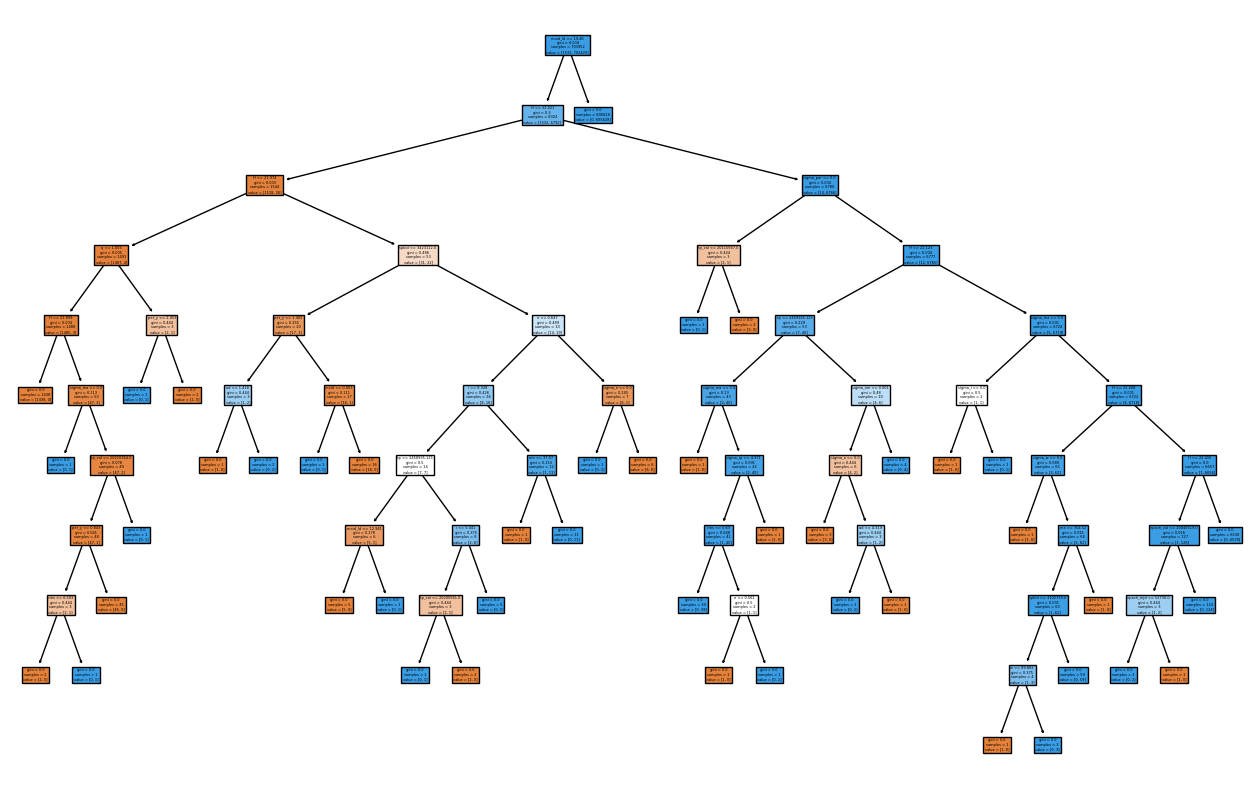

In [76]:
# # # # Train the model
dtree_max = DecisionTreeClassifier().fit(X_train, y_train)

# 
plt.figure(figsize=(16, 10)) 
plot_tree(dtree_max, feature_names = list(X_tree.columns), filled = True)

In [78]:
test_score = dtree_max.score(X_test, y_test)
print(f"Test Set Score: {test_score:.4f}")

Test Set Score: 0.9999


# Best Model According to GridSearchCV

In [74]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

tree_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 4, 5, 6, 7, 8]
}

# Instantiate DecisionTreeClassifier and GridSearchCV
tree_gs = GridSearchCV(DecisionTreeClassifier(), tree_param, cv=5)

# Fit model to training data
tree_gs.fit(X_train, y_train)

# Get best hyperparameters and best cross-validation score
best_params = tree_gs.best_params_
best_score = tree_gs.best_score_

print(f"Tuned Decision Tree Parameters: {best_params}")
print(f"Best Cross-Validation Score: {best_score:.4f}")

# Get accuracy on the test set
test_score = tree_gs.best_estimator_.score(X_test, y_test)
print(f"Test Set Score: {test_score:.4f}")

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 3}
Best Cross-Validation Score: 0.9999
Test Set Score: 0.9999


In [75]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define hyperparameter distributions
param_dist = {
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Instantiate RandomizedSearchCV
tree_rs = RandomizedSearchCV(DecisionTreeClassifier(), param_distributions=param_dist, cv=5, n_iter=10)

# Fit it to the training data
tree_rs.fit(X_train, y_train)

# Get best hyperparameters and best cross-validation score
best_params = tree_rs.best_params_
best_score = tree_rs.best_score_

print(f"Tuned Decision Tree Parameters: {best_params}")
print(f"Best Cross-Validation Score: {best_score:.4f}")

# Evaluate on test set
test_score = tree_rs.best_estimator_.score(X_test, y_test)
print(f"Test Set Score: {test_score:.4f}")

Tuned Decision Tree Parameters: {'min_samples_split': 2, 'max_depth': 3, 'criterion': 'entropy'}
Best Cross-Validation Score: 0.9999
Test Set Score: 0.9999


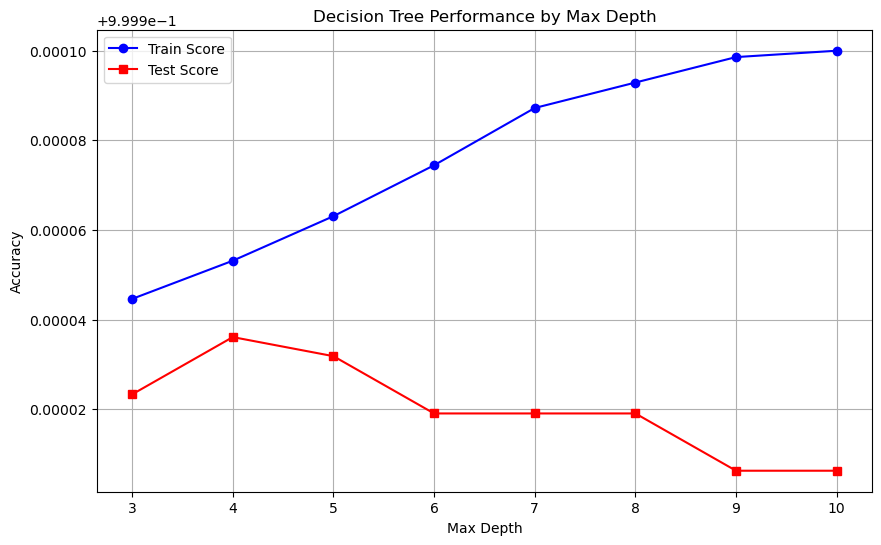

In [83]:
def plot_tree_scores(X_train, X_test, y_train, y_test):
    depths = range(3, 11)  # Max depth from 3 to 10
    train_scores = []
    test_scores = []

    for depth in depths:
        # Train Decision Tree with current max_depth
        dtree = DecisionTreeClassifier(max_depth=depth, random_state=42)
        dtree.fit(X_train, y_train)

        # Store scores
        train_scores.append(dtree.score(X_train, y_train))
        test_scores.append(dtree.score(X_test, y_test))

    # Plot results
    plt.figure(figsize=(10, 6))
    plt.plot(depths, train_scores, marker='o', linestyle='-', label='Train Score', color='blue')
    plt.plot(depths, test_scores, marker='s', linestyle='-', label='Test Score', color='red')
    plt.xlabel('Max Depth')
    plt.ylabel('Accuracy')
    plt.title('Decision Tree Performance by Max Depth')
    plt.legend()
    plt.grid(True)
    plt.show()

# Run the function
plot_tree_scores(X_train, X_test, y_train, y_test)
